In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

In [3]:
df=pd.read_csv('/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv')

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [5]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [7]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10
166799,5YJSA1E27H,Pierce,Gig Harbor,WA,98332.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,26.0,169045789,POINT (-122.589645 47.342345),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [8]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,166795.000000,166800.000000,166800.000000,166800.000000,166440.000000,1.668000e+05,1.667950e+05
mean,98173.713750,2020.341793,61.508993,1152.723171,29.178941,2.172420e+08,5.297709e+10
std,2442.584415,3.001465,93.271747,8661.081091,14.853534,7.727458e+07,1.569754e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.790741e+08,5.303301e+10
50%,98122.000000,2021.000000,0.000000,0.000000,33.000000,2.244045e+08,5.303303e+10
75%,98371.000000,2023.000000,84.000000,0.000000,42.000000,2.513421e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [9]:
df.duplicated().sum()

0

In [10]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


In [11]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [12]:
df.dropna(inplace=True)
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,99223.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,6.0,239527123,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
166796,5YJYGDEE5M,King,Sammamish,WA,98074.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,148715479,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,98275.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,220504406,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC,5.306104e+10
166798,1G1RH6E43D,Lewis,Mossyrock,WA,98564.0,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,20.0,156418475,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304197e+10


In [13]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [14]:
df.value_counts('Make')

Make
TESLA                   74661
NISSAN                  13835
CHEVROLET               13046
FORD                     8557
BMW                      7181
KIA                      6984
TOYOTA                   5780
VOLKSWAGEN               4706
JEEP                     4090
HYUNDAI                  4049
VOLVO                    3954
RIVIAN                   3550
AUDI                     3456
CHRYSLER                 2865
MERCEDES-BENZ            1341
PORSCHE                  1096
MITSUBISHI                940
MINI                      854
POLESTAR                  852
HONDA                     819
FIAT                      801
SUBARU                    787
MAZDA                     384
LEXUS                     307
SMART                     275
LINCOLN                   253
CADILLAC                  243
LUCID                     231
JAGUAR                    221
GENESIS                   160
LAND ROVER                 52
ALFA ROMEO                 29
DODGE                      28
FISKE

In [15]:
df.value_counts('Make',normalize=True)

Make
TESLA                   0.448590
NISSAN                  0.083126
CHEVROLET               0.078385
FORD                    0.051413
BMW                     0.043146
KIA                     0.041962
TOYOTA                  0.034728
VOLKSWAGEN              0.028275
JEEP                    0.024574
HYUNDAI                 0.024328
VOLVO                   0.023757
RIVIAN                  0.021330
AUDI                    0.020765
CHRYSLER                0.017214
MERCEDES-BENZ           0.008057
PORSCHE                 0.006585
MITSUBISHI              0.005648
MINI                    0.005131
POLESTAR                0.005119
HONDA                   0.004921
FIAT                    0.004813
SUBARU                  0.004729
MAZDA                   0.002307
LEXUS                   0.001845
SMART                   0.001652
LINCOLN                 0.001520
CADILLAC                0.001460
LUCID                   0.001388
JAGUAR                  0.001328
GENESIS                 0.000961
LAND 

In [16]:
df1=df.groupby('Make').agg({'Electric Range':'mean'})
df1

,Electric Range
Make,
ALFA ROMEO,33.000000
AUDI,52.094907
AZURE DYNAMICS,56.000000
BENTLEY,19.666667
BMW,35.665645
CADILLAC,13.563786
CHEVROLET,95.035337
CHRYSLER,32.218848
DODGE,32.000000


In [17]:
px.histogram(df,x='Make',y='Electric Range')

In [18]:
px.bar(df1)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 2000x800 with 0 Axes>

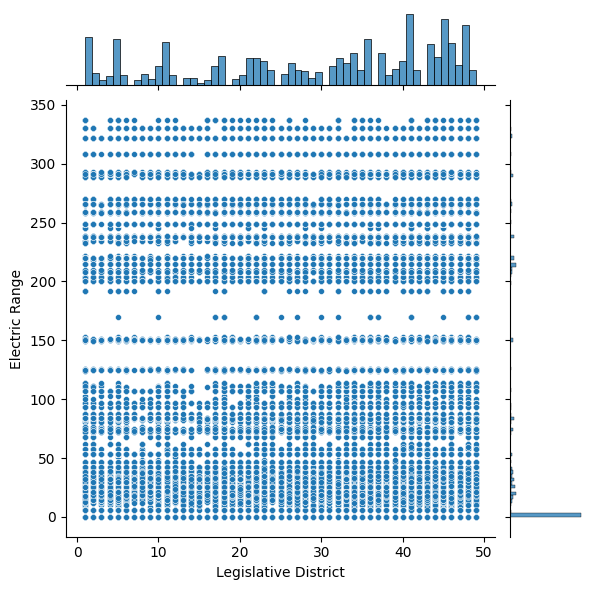

In [19]:
plt.figure(figsize=(20,8))
sns.jointplot(data=df,x='Legislative District',y='Electric Range',palette='tab10', s=18)

In [20]:
df.dtypes


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

<Axes: xlabel='VIN (1-10)', ylabel='Base MSRP'>

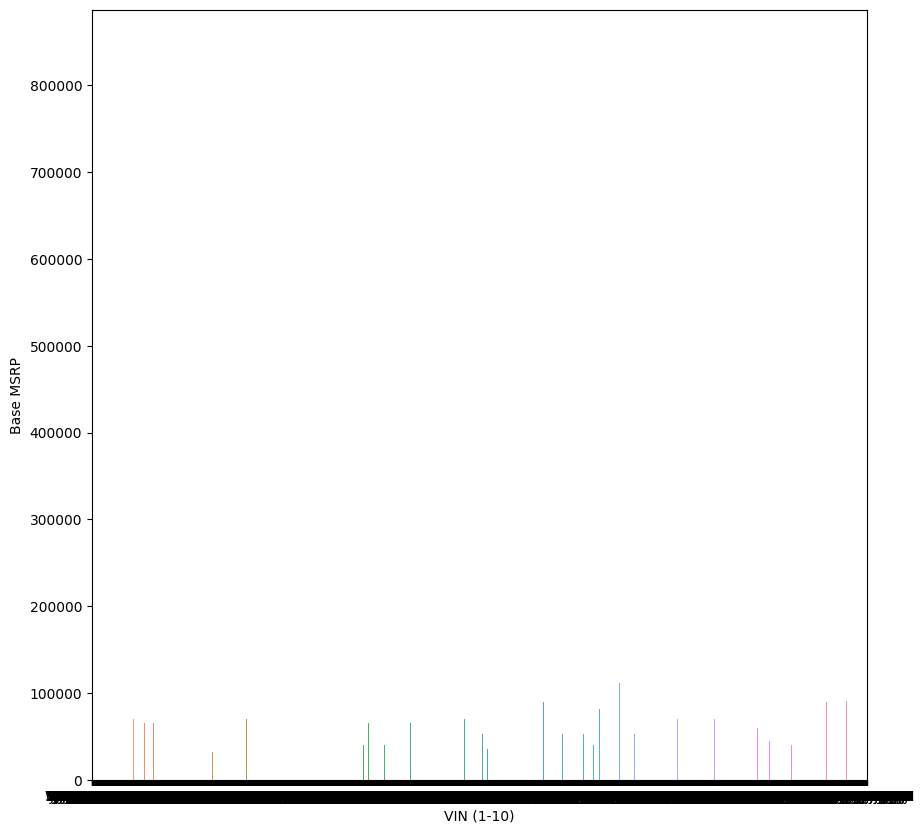

In [21]:

plt.figure(figsize=(10,10))
sns.barplot(data=df,x='VIN (1-10)',y='Base MSRP')